<a href="https://colab.research.google.com/github/khangsheng1/PyTorch-Tutorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://archive.ics.uci.edu/dataset/53/iris
# https://gist.github.com/curran/a08a1080b88344b0c8a7
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherites nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (# of neurons) -->
  # Hidden Layer2 (# of neurons) -->
  # Output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiat our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) # relu = rectified linear unit
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Change last column from strings to integer
my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Split data into training and testing sets
X = my_df.drop('species', axis=1)
y = my_df['species']

In [8]:
X = X.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [10]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [11]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
# Set the criterion of the model to measure the error,
# how fare off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, set lr = learning rate (if error doesn't go down after a
# bunch of iterations (epochs), lower out learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [14]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward
  # propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812923431396
Epoch: 30 and loss: 0.634953498840332
Epoch: 40 and loss: 0.44043001532554626
Epoch: 50 and loss: 0.29171693325042725
Epoch: 60 and loss: 0.17829042673110962
Epoch: 70 and loss: 0.11587585508823395
Epoch: 80 and loss: 0.08928148448467255
Epoch: 90 and loss: 0.07743765413761139


Text(0.5, 1.0, 'Loss per epoch')

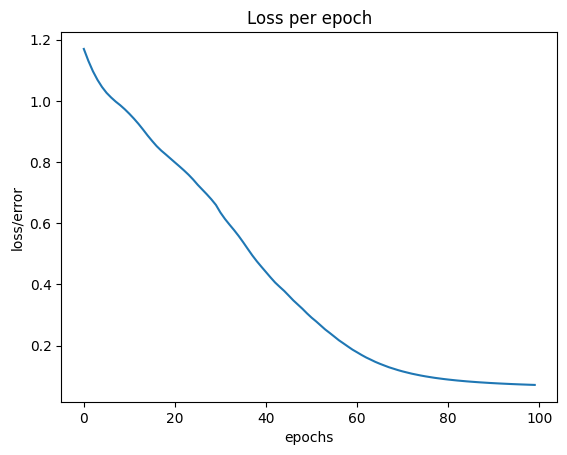

In [15]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")
plt.title("Loss per epoch")

In [16]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss/error

In [17]:
# You want this loss number to match that of the testing data
loss

tensor(0.0539)

In [18]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
          x = 'setosa'
        elif y_test[i] == 1:
          x = 'versicolor'
        else:
          x = 'virginica'

        # Will tell us what type of flower class our network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {x} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:  # Add parentheses after item()
            correct += 1

print(f'We got {correct} correct!')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 versicolor 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 setosa 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 setosa 	 0
4.) tensor([-3.3305,  4.2647,  0.0569]) 	 1 	 versicolor 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 virginica 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 virginica 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 setosa 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 setosa 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 versicolor 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 setosa 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 versicolor 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 virginica 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 versicolor 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 versicolor 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 virginica 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 virginica 	 2
17.) tensor([-3.7724,  3.65

In [19]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [25]:
with torch.no_grad():
  if y_test[i] == 0:
    x = 'setosa'
  elif y_test[i] == 1:
    x = 'versicolor'
  else:
    x = 'virginica'
  # Will tell us what type of flower class our network thinks it is
  print(f'{model(new_iris)} \t {x}')

tensor([  6.9155,   1.2532, -10.6096]) 	 setosa


In [27]:
newer_iris = torch.tensor([5.0,	3.6, 1.4, 0.2])

with torch.no_grad():
  if y_test[i] == 0:
    x = 'setosa'
  elif y_test[i] == 1:
    x = 'versicolor'
  else:
    x = 'virginica'
  # Will tell us what type of flower class our network thinks it is
  print(f'{model(newer_iris)} \t {x}')

tensor([  7.5441,   1.2654, -11.4730]) 	 setosa


In [29]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [31]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-31-5cdeecb78af9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [32]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)